<a href="https://colab.research.google.com/github/NguyenVoT22/Histology-Image-Segmentation/blob/main/Histology_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is image segmentation?
So far you have seen image classification, where the task of the network is to assign a label or class to an input image. However, suppose you want to know where an object is located in the image, the shape of that object, which pixel belongs to which object, etc. In this case you will want to segment the image, i.e., each pixel of the image is given a label. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging to name a few.

The dataset that is being used is the Warwick Dataset, created by K. Sirinukunwattana, D.R.J. Snead, N.M. Rajpoot. The [dataset](https://warwick.ac.uk/fac/sci/dcs/research/tia/glascontest/download/) consists of images, their corresponding labels, and pixel-wise masks. The masks are basically labels for each pixel. Each pixel is given one of three categories :


*   Class 1 : Pixel belonging to the histology.
*   Class 2 : Pixel bordering the histology.
*   Class 3 : None of the above/Surrounding pixel.


**Notes to remember using this Colab**


The ! in Colab means you are using a linux command (e.g if I don't know what does wget command I can use the !man wget instead when we are on the terminal it would be -man wget) 

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

# import tensorflow_datasets as tfds

import re
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt

from numpy import newaxis
import numpy as np

import os
from skimage.io import imread


In [ ]:
!wget https://warwick.ac.uk/fac/sci/dcs/research/tia/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip # downloading file from URL over network
!unzip warwick_qu_dataset_released_2016_07_08.zip # unzipping the file
!ls # shows wear the file is located

--2021-06-03 22:04:26--  https://warwick.ac.uk/fac/sci/dcs/research/tia/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip
Resolving warwick.ac.uk (warwick.ac.uk)... 137.205.28.41
Connecting to warwick.ac.uk (warwick.ac.uk)|137.205.28.41|:443... connected.
HTTP request sent, awaiting response... 301 
Location: https://warwick.ac.uk/fac/cross_fac/tia/data/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip [following]
--2021-06-03 22:04:26--  https://warwick.ac.uk/fac/cross_fac/tia/data/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip
Reusing existing connection to warwick.ac.uk:443.
HTTP request sent, awaiting response... 200 
Length: 180902609 (173M) [application/zip]
Saving to: ‘warwick_qu_dataset_released_2016_07_08.zip’

warwick_qu_dataset_ 100%[===================>] 172.52M  14.6MB/s    in 12s     

2021-06-03 22:04:38 (14.3 MB/s) - ‘warwick_qu_dataset_released_2016_07_08.zip’ saved [180902609/180902609]

Archive:  warwick_qu_dataset_release

anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 
(522, 775)
input_anno_img.shape (after we resize) =
(128, 128, 1)
anno.shape before we resize = 

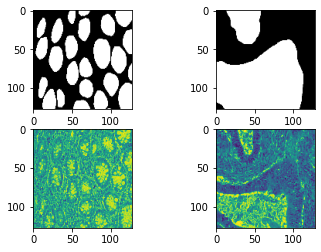

In [ ]:
def show_labeled_images(data_directory):
  
  for f in os.listdir(path=data_directory): # for every in the path
    # print(data_directory + f) # print the file path
    if (f.endswith('.bmp')):
      key = re.findall("\d+", f)[0]
      #print(key)
      file = imread(data_directory + f, as_gray=True) # read the image to variable 'file'
      if (f.endswith('anno.bmp')): # if the file ends with specifically the anno.bmp
        anno = file.copy()
        anno[anno > 0] = 1
        print('anno.shape before we resize = ')
        print(anno.shape)
        input_anno_img = tf.image.resize(anno[:,:, newaxis], (128, 128))
        print('input_anno_img.shape (after we resize) =')
        print(input_anno_img.shape)
        if (f.startswith('test')):
          #print(f)
          test_anno_list[key] = input_anno_img
        # print("Updated test_anno_list:", test_anno_list)
        # print(len(test_anno_list)) # printing the length the list
        elif (f.startswith('train')):
          train_anno_list[key] = input_anno_img
        

      else:
        input_orig_img = tf.image.resize(file[:,:, newaxis], (128, 128))
        if (f.startswith('test')):
          #print(f)
          test_orig_list[key] = input_orig_img
        elif (f.startswith('train')):
          train_orig_list[key] = input_orig_img
        # print("Updated anno_list:", test_orig_list)
        # print(len(test_orig_list)) # printing the length the list
        # plt.figure() # set a blank grid/graph to put things on
        # plt.subplot(1,3,1) # make a 1 x 3 plot and focus on the 1st column
        # plt.imshow(file) # shows the image that was stored in the file variable

  print(len(test_anno_list))
  print(len(test_orig_list))
  print(len(train_anno_list))
  print(len(train_orig_list))
  plt.figure() # set a blank grid/graph to put things on
  plt.subplot(2,2,1) # make a 2 x 2 plot and focus on the 1st postion
  plt.imshow(test_anno_list.get('40')[:,:,0], cmap='gray') # shows the image that was stored in the first index of test_anno_list
  print(test_anno_list.get('40'))
  plt.subplot(2,2,2) # make a 2 x 2 plot and focus on the 2nd postion
  plt.imshow(train_anno_list.get('40')[:,:,0], cmap='gray') # shows the image that was stored in the first index of train_anno_list
  print(train_anno_list.get('40'))
  plt.subplot(2,2,3) # make a 2 x 2 plot and focus on the 3rd position
  plt.imshow(test_orig_list.get('40')[:,:,0]) # shows the image that was stored in the first index of test_anno_list
  print(test_orig_list.get('40'))
  plt.subplot(2,2,4) # make a 2 x 2 plot and focus on the 4th position
  plt.imshow(train_orig_list.get('40')[:,:,0]) # shows the image that was stored in the first index of train_orig_list
  print(train_orig_list.get('40'))
  #   plt.title('Original image: %s' % s.frame.dataname)
  #   plt.subplot(1,3,2)
  #   plt.imshow(s.mask)
  #   plt.title('Segmented mask: %s' % s.frame.dataname)
  #   plt.subplot(1,3,3)
  #   plt.imshow(s.debug, 'gray', interpolation='none')
  #   plt.imshow(s.mask, 'jet', alpha=0.5)

test_anno_list = {} # creates an empty dict for later storage of annotated test imgs
test_orig_list = {} # creates an empty dict for later storage of original test imgs
train_anno_list = {} # creates an empty dict for later storage of annotated training imgs
train_orig_list = {} # creates an empty dict for later storage of original training imgs

show_labeled_images("/content/Warwick QU Dataset (Released 2016_07_08)/") # calls the function that is pointing in the file directory


The images and masks in the dataset are 8 bit color images, which means they are comprised of 256 colors. We choose to the normalize the images because it will be in the range of [0,1] instead of [0,256].


*   1 = white = what is included
*   0 = black = what is the background ish




In [ ]:
def normalize(input_image):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  return input_image
normalized_test_orig_list = {}
normalized_train_orig_list = {}
for key,value in test_orig_list.items():
  normalized_test_orig_list[key] = normalize(value)
  print(value)

for key,value in train_orig_list.items():
  normalized_train_orig_list[key] = normalize(value)
  print(value)

# print(test_anno_list.get('40'))
# normalize(test_anno_list.get('40'))
# normalize(train_anno_list.get('40'))
# normalize(test_orig_list.get('40'))
# normalize(train_orig_list.get('40'))

Streaming output truncated to the last 5000 lines.
tf.Tensor(
[[[0.9605333 ]
  [0.96432537]
  [0.88118225]
  ...
  [0.6568762 ]
  [0.7874823 ]
  [0.9136827 ]]

 [[0.97313654]
  [0.95602393]
  [0.8290267 ]
  ...
  [0.69276494]
  [0.9151859 ]
  [0.8704974 ]]

 [[0.9754294 ]
  [0.9726541 ]
  [0.9233934 ]
  ...
  [0.69182724]
  [0.82016623]
  [0.8943271 ]]

 ...

 [[0.98960036]
  [0.99105656]
  [0.9920173 ]
  ...
  [0.9849208 ]
  [0.98643   ]
  [0.98137194]]

 [[0.98961014]
  [0.9800945 ]
  [0.9896638 ]
  ...
  [0.9802263 ]
  [0.98503196]
  [0.98687434]]

 [[0.98815167]
  [0.98800135]
  [0.9909517 ]
  ...
  [0.9838138 ]
  [0.9837202 ]
  [0.98596483]]], shape=(128, 128, 1), dtype=float32)
tf.Tensor(
[[[0.7659345 ]
  [0.8702593 ]
  [0.514381  ]
  ...
  [0.9081343 ]
  [0.8352583 ]
  [0.70916426]]

 [[0.82821167]
  [0.7533622 ]
  [0.5202306 ]
  ...
  [0.90232915]
  [0.8715914 ]
  [0.89292306]]

 [[0.8065594 ]
  [0.6122925 ]
  [0.51625615]
  ...
  [0.892559  ]
  [0.8579014 ]
  [0.7745874 ]]

 .

## Define the model
The model being used here is a modified U-Net. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder. Thus, the encoder for this task will be a pretrained MobileNetV2 model, whose intermediate outputs will be used, and the decoder will be the upsample block already implemented in TensorFlow Examples in the [Pix2pix tutorial](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py). 

The reason to output three channels is because there are three possible labels for each pixel. Think of this as multi-classification where each pixel is being classified into three classes.

In [ ]:
# OUTPUT_CHANNELS = 2
OUTPUT_CHANNELS = 3

As mentioned, the encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in [tf.keras.applications](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications). The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

-----------
[What really is MobileNetV2?](https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2)

In [ ]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 2], include_top=False)
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


The decoder/upsampler is simply a series of upsample blocks implemented in TensorFlow examples.

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

## Train the model
Now, all that is left to do is to compile and train the model. The loss being used here is `losses.SparseCategoricalCrossentropy(from_logits=True)`. The reason to use this loss function is because the network is trying to assign each pixel a label, just like multi-class prediction. In the true segmentation mask, each pixel has either a {0,1,2}. The network here is outputting three channels. Essentially, each channel is trying to learn to predict a class, and `losses.SparseCategoricalCrossentropy(from_logits=True)` is the recommended loss for 
such a scenario. Using the output of the network, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Have a quick look at the resulting model architecture:

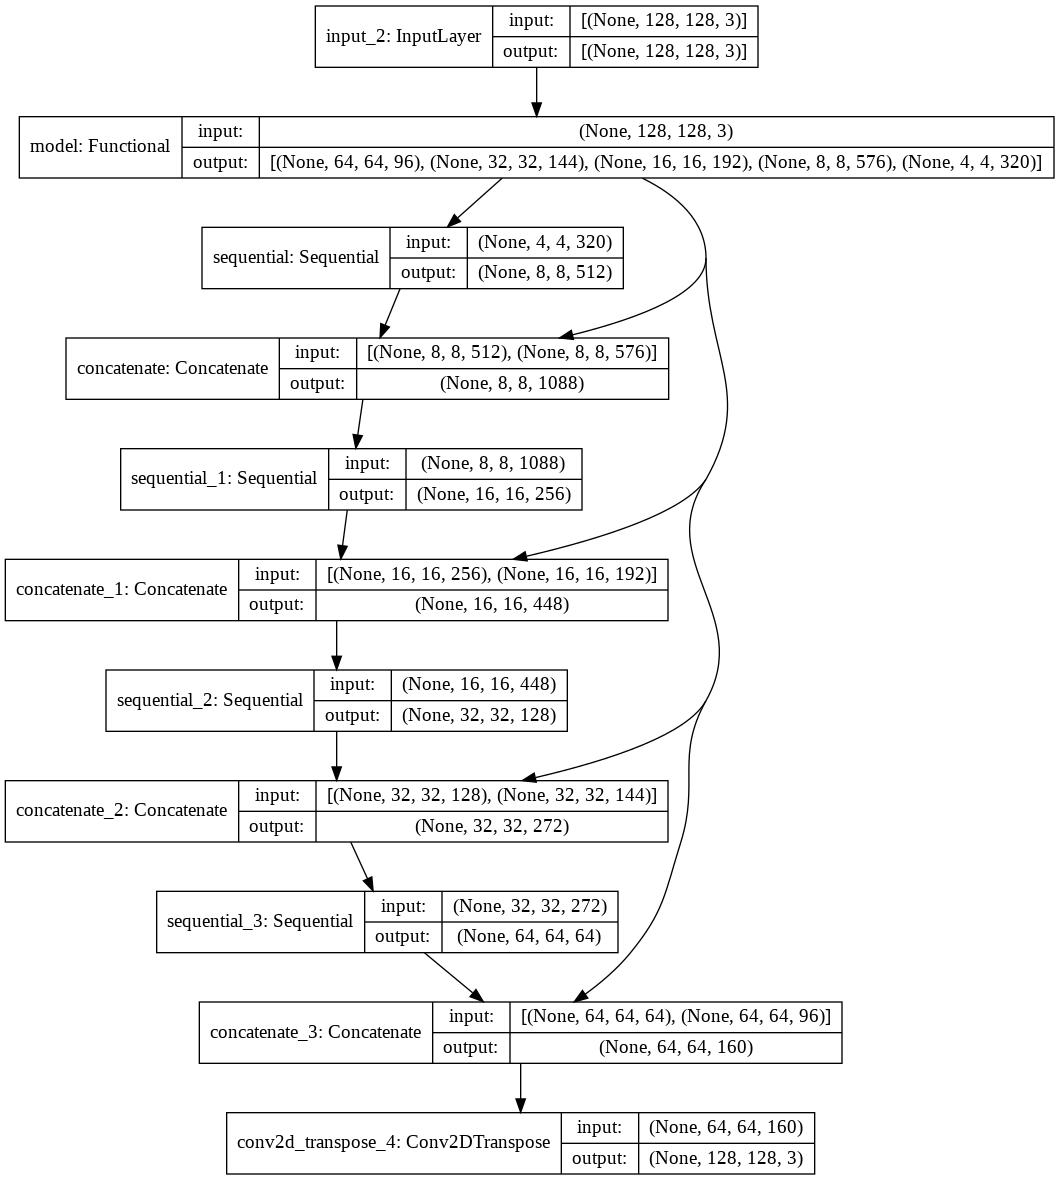

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(image, mask):
  pred_mask = model.predict(image)
  # display([image, mask, create_mask(pred_mask)])

In [ ]:
from numpy import newaxis
# a = np.array(normalized_test_orig_list.get('40'))
# img = np.dstack([a, a, a])
img = normalized_test_orig_list.get('40')
# print(img.shape)
# reshaped_img = np.asarray(img).reshape((None, 128, 128, 1))
reshaped_img = img[...,newaxis]
print(reshaped_img.shape)
show_predictions(reshaped_img, test_anno_list.get('40'))

(128, 128, 1, 1)


ValueError: ignored